In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import xgboost

In [11]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
df.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


<Axes: xlabel='price', ylabel='Count'>

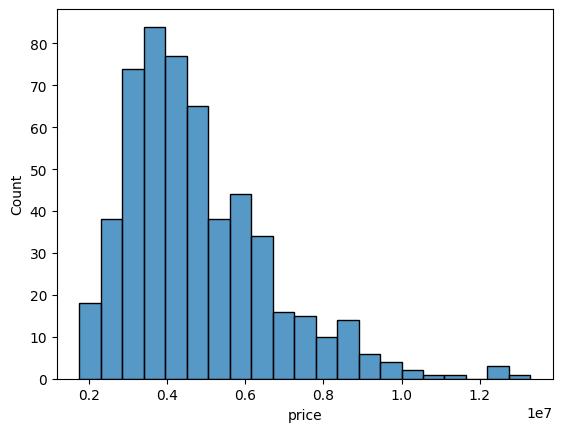

In [13]:
sns.histplot(data=df,
             x="price",)            # distribution of 'price' attribute

<Axes: xlabel='price'>

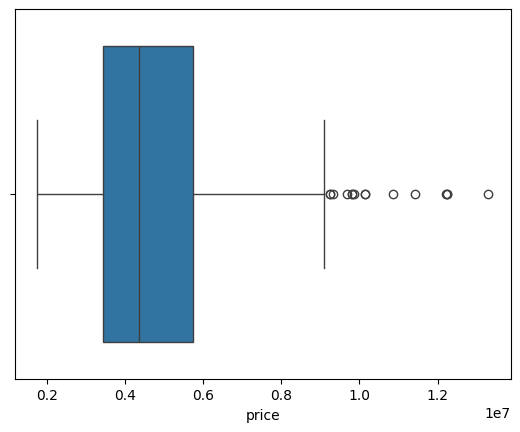

In [14]:
sns.boxplot(data=df,
             x="price")            # Staticial distribution of 'price' attribute

<Axes: xlabel='price'>

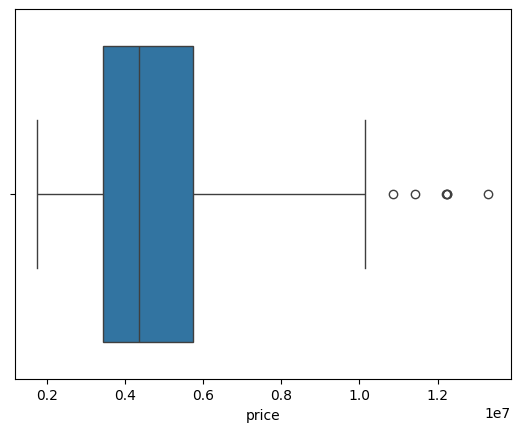

In [15]:
sns.boxplot(data=df,
             x="price",
             whis=2.0)  

<Axes: xlabel='price'>

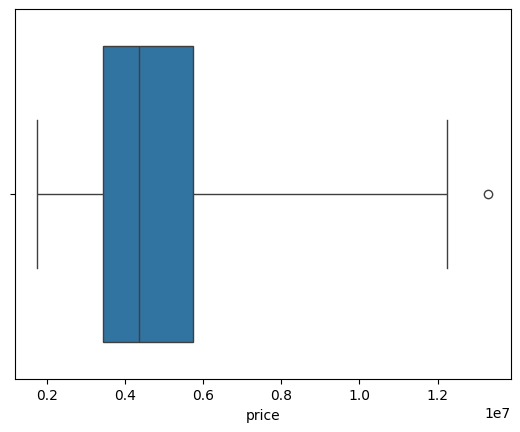

In [16]:
sns.boxplot(data=df,
             x="price",
             whis=2.9) 

<Axes: xlabel='price'>

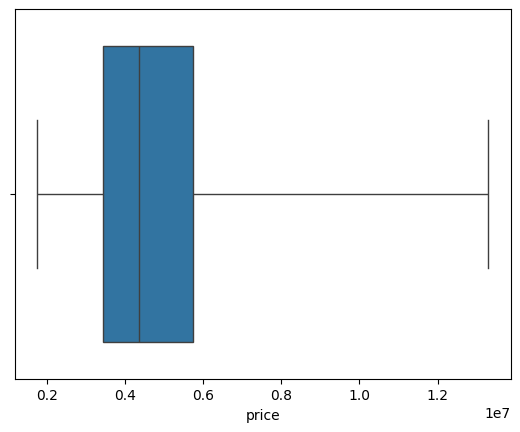

In [17]:
sns.boxplot(data=df,
             x="price",
             whis=3.3) 

<Axes: xlabel='price'>

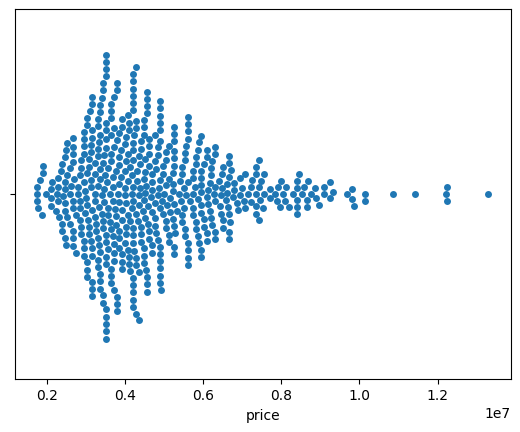

In [18]:
sns.swarmplot(data=df,
             x="price")            # Distribution with every point value 'price' attribute

In [19]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 2.9 * IQR

extreme_df = df[(df['price'] > upper_bound)]

In [20]:
extreme_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


-> Only one value is extreme from whisker > 2.9 and the whole is in under whisker = 3.3.
-> The upper extreme values of 'price' is valid becuase I think it is real.

--------------------------------------------------------------------

<Axes: xlabel='area', ylabel='Count'>

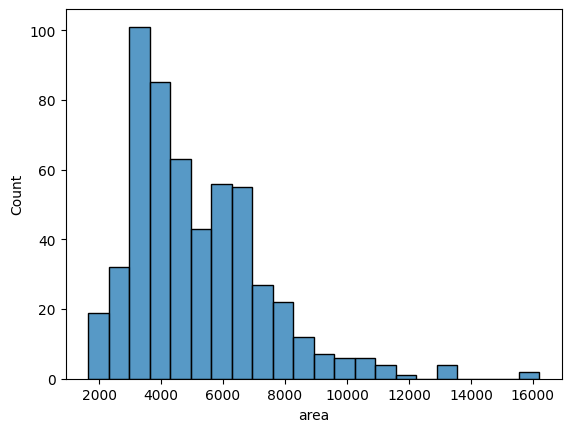

In [21]:
sns.histplot(data=df,
             x="area")                       # distribution of 'area' attribute

<Axes: xlabel='area'>

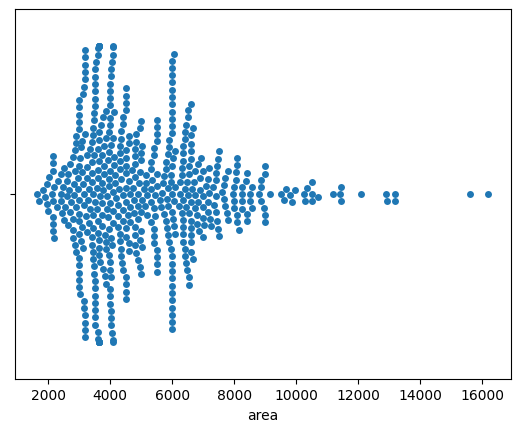

In [22]:
sns.swarmplot(data=df,
             x="area")            # distribution of every point 'area' attribute

<Axes: xlabel='area'>

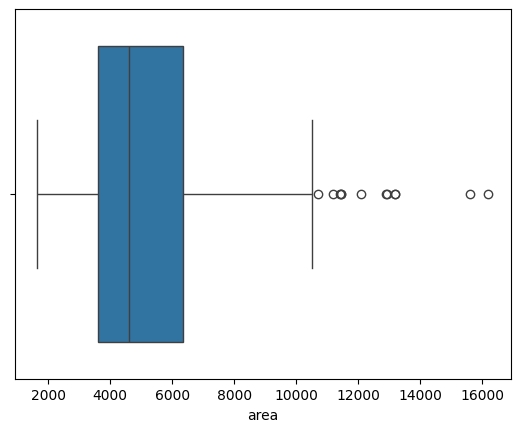

In [23]:
sns.boxplot(data=df,
            x="area")

<Axes: xlabel='area'>

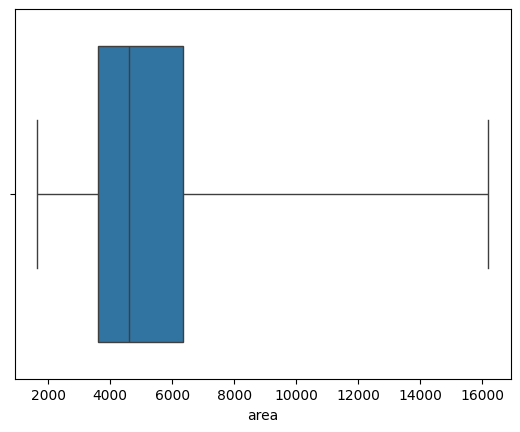

In [24]:
sns.boxplot(data=df,
            x="area", 
            whis=3.6)

In [25]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 2.5 * IQR

extreme_df = df[(df['area'] > upper_bound)]

In [26]:
extreme_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished


'12' data points is beyoung at defsult '1.5' whisker. Only two data points is extreme at '2.5' whisker, the whole data is indure 3.6 whisker.
-----------------------------------------------------------------

<Axes: xlabel='area', ylabel='price'>

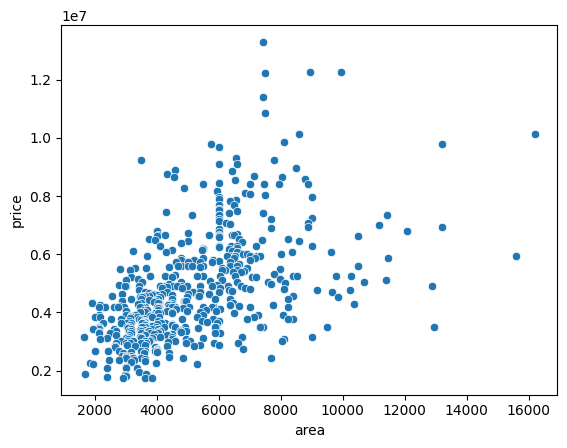

In [27]:
sns.scatterplot(data=df,
                x="area",
                y="price")

In [28]:
corr = df['area'].corr(df['price'])             #corelation between these attribute
print("Pearson correlation:", corr)

Pearson correlation: 0.5359973457780801


-> The correlation is 0.5, It show the realationship between 'area' and 'price' is Postive, appro-linear, have some noisy, hetercasedecity is present and Not segmented.


=================================================================================== 

<Axes: xlabel='bedrooms', ylabel='count'>

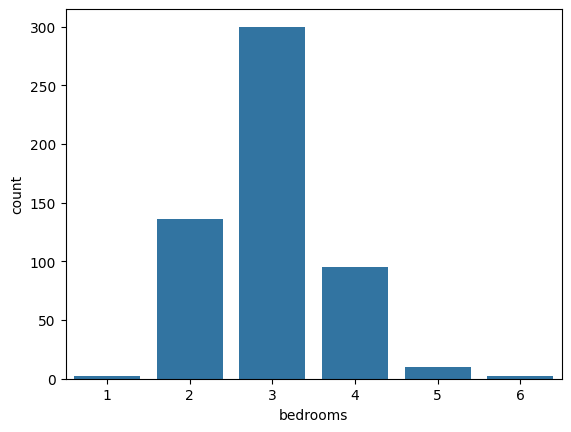

In [29]:
sns.countplot(data=df,
              x="bedrooms")           # distribution of discrete value

<Axes: xlabel='bedrooms', ylabel='price'>

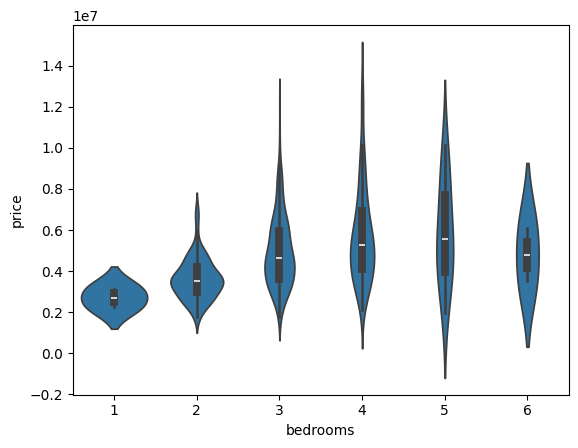

In [30]:
sns.violinplot(data=df,
               x="bedrooms",
               y="price")                        # comparsion between 'bedrooms vs price'

In [31]:
df.groupby("bedrooms")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
1,2.0,2.712500e+06,6.187184e+05,2275000.0,2493750.0,2712500.0,2931250.0,3150000.0
2,136.0,3.632022e+06,1.004024e+06,1750000.0,2992500.0,3535000.0,4217500.0,7070000.0
3,300.0,4.954598e+06,1.747527e+06,1750000.0,3640000.0,4620000.0,5967500.0,12250000.0
4,95.0,5.729758e+06,2.307740e+06,2100000.0,4095000.0,5250000.0,6912500.0,13300000.0
5,10.0,5.819800e+06,2.502315e+06,1960000.0,3972500.0,5582500.0,7700000.0,10150000.0
6,2.0,4.791500e+06,1.826457e+06,3500000.0,4145750.0,4791500.0,5437250.0,6083000.0


In [32]:
range_median_shift = 5250000.0 - 3535000.0
print(range_median_shift)

1715000.0


In [33]:
df["price"].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [34]:
# df has 'bedrooms' and 'price'

# Overall median and std
overall_median = df['price'].median()
overall_std = df['price'].std()

# Median price per bedrooms category
category_medians = df.groupby('bedrooms')['price'].median()

# Compute IEM per category
iem = (category_medians - overall_median) / overall_std

print("Indicator Effect Magnitude (IEM) per category:")
print(iem)


Indicator Effect Magnitude (IEM) per category:
bedrooms
1   -0.870116
2   -0.430380
3    0.149697
4    0.486517
5    0.664282
6    0.241387
Name: price, dtype: float64


-> upward central tendency direction
-> moderate influence on perdiction, because the IED of '2' catgegory median influence on price is '-0.4', '3' category is median Influence '0.14' and '4' infleunce is '0.48', It is show moderate but upward direction.
-> Ignore the bedrooms '1', '5' and '6' because it is very rare count
-> sligthly overlap

==================================================================================

<Axes: xlabel='bathrooms', ylabel='count'>

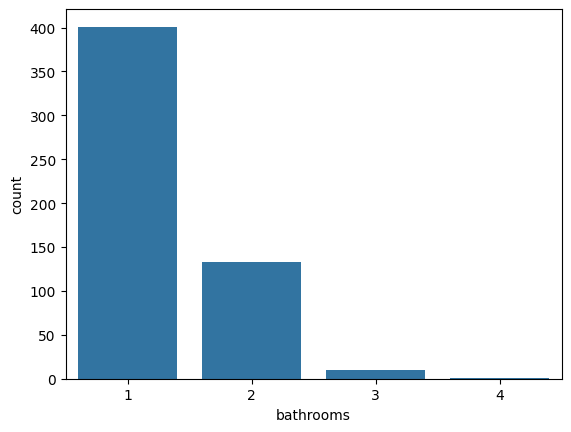

In [35]:
sns.countplot(data=df,
              x="bathrooms")

<Axes: xlabel='bathrooms', ylabel='price'>

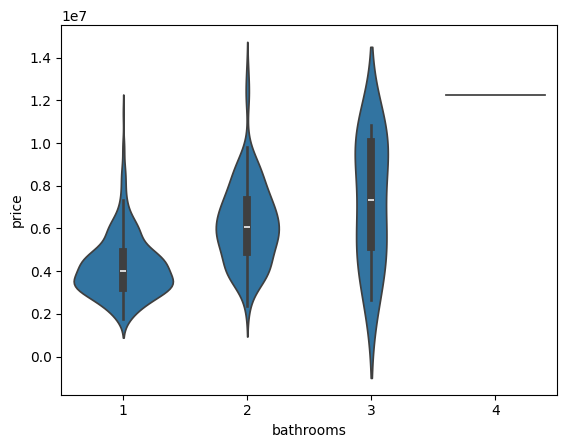

In [36]:
sns.violinplot(data=df,
              x="bathrooms",
              y="price")

In [37]:
df.groupby("bathrooms")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
1,401.0,4.206913e+06,1.432609e+06,1750000.0,3234000.0,3990000.0,4900000.0,11410000.0
2,133.0,6.209206e+06,1.916503e+06,2380000.0,4893000.0,6090000.0,7350000.0,13300000.0
3,10.0,7.282100e+06,2.901083e+06,2660000.0,5110000.0,7315000.0,10032750.0,10850000.0
4,1.0,1.225000e+07,NaN,12250000.0,12250000.0,12250000.0,12250000.0,12250000.0


In [38]:
# df has 'bathrooms' and 'price'

# Median price per bathrooms category
category_medians = df.groupby('bathrooms')['price'].median()

# Compute IEM per category
iem = (category_medians - overall_median) / overall_std

print("Indicator Effect Magnitude (IEM) per category:")
print(iem)

Indicator Effect Magnitude (IEM) per category:
bathrooms
1   -0.187122
2    0.935609
3    1.590535
4    4.228952
Name: price, dtype: float64



The IEM of catgory '1' and '2' bathrooms on price is '-0.187' and '0.935' this show direction of bathrooms have upward and strenght is moderate and slightly overlap and Ignore the '3' and '4' bathrooms because their count is negligble


Could we sub grouping of least catgories


============================================================================

<Axes: xlabel='stories', ylabel='count'>

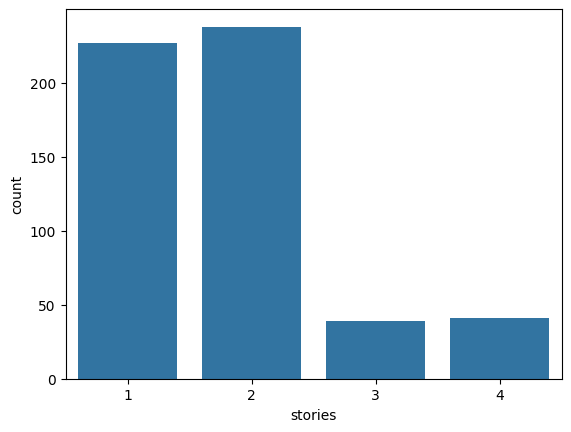

In [39]:
sns.countplot(data=df,
              x="stories")

In [40]:
df.groupby("stories")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
stories,,,,,,,,
1,227.0,4.170659e+06,1.424693e+06,1750000.0,3150000.0,3850000.0,5019000.0,10850000.0
2,238.0,4.764074e+06,1.925702e+06,1750000.0,3500000.0,4308500.0,5250000.0,12250000.0
3,39.0,5.685436e+06,1.764089e+06,2852500.0,4427500.0,5873000.0,6296500.0,13300000.0
4,41.0,7.208450e+06,1.494494e+06,4550000.0,6195000.0,7350000.0,7910000.0,12250000.0


In [41]:
range_median_shift = 7350000.0 - 3850000.0 
print("range_median_shift: ",range_median_shift)

range_median_shift:  3500000.0


In [42]:
# df has 'stories' and 'price'

# Median price per stories category
category_medians = df.groupby('stories')['price'].median()

# Compute IEM per category
iem = (category_medians - overall_median) / overall_std

print("Indicator Effect Magnitude (IEM) per category:")
print(iem)

Indicator Effect Magnitude (IEM) per category:
stories
1   -0.261970
2   -0.016841
3    0.819593
4    1.609247
Name: price, dtype: float64


The IEM show the direction is upward, the strenght is strong, little overlap that show price is not only depend on 'stories' feature, sample of '3 and 4 stories' is less but acceptable.


keep the '3' and '4' category as is it.

====================================================================================

<Axes: xlabel='mainroad', ylabel='count'>

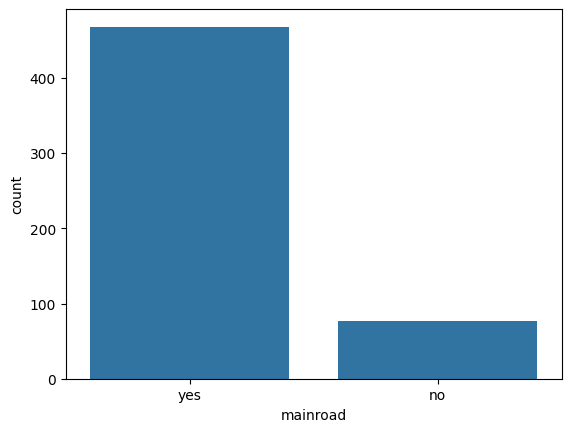

In [43]:
sns.countplot(data=df,
              x="mainroad")

-> Highly imbalance

In [44]:
df.groupby("mainroad")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
mainroad,,,,,,,,
no,77.0,3.398905e+06,8.947355e+05,1750000.0,2835000.0,3290000.0,3990000.0,5600000.0
yes,468.0,4.991777e+06,1.893639e+06,1750000.0,3638250.0,4550000.0,5967500.0,13300000.0


In [45]:
range_median_shift = (4550000.0 - 3290000.0)
print(range_median_shift)

1260000.0


In [46]:
# df has 'mainroad' and 'price'

# Median price per stories category
category_medians = df.groupby('mainroad')['price'].median()

# Compute IEM per category
iem = (category_medians - overall_median) / overall_std

print("Indicator Effect Magnitude (IEM) per category:")
print(iem)

Indicator Effect Magnitude (IEM) per category:
mainroad
no    -0.561365
yes    0.112273
Name: price, dtype: float64


-> upward 
-> 'no' category standalone is weak to moderate while 'yes' category is weak
-> not completely overlap but from min side is overlad
-> higly imblance should be use tree based model

================================================================

Encode this categorical Feature

In [47]:
df['mainroad'] = df["mainroad"].map({'yes': 1, 'no': 0 })

In [48]:
df["mainroad"]

0      1
1      1
2      1
3      1
4      1
      ..
540    1
541    0
542    1
543    0
544    1
Name: mainroad, Length: 545, dtype: int64

=================================================================

<Axes: xlabel='guestroom', ylabel='count'>

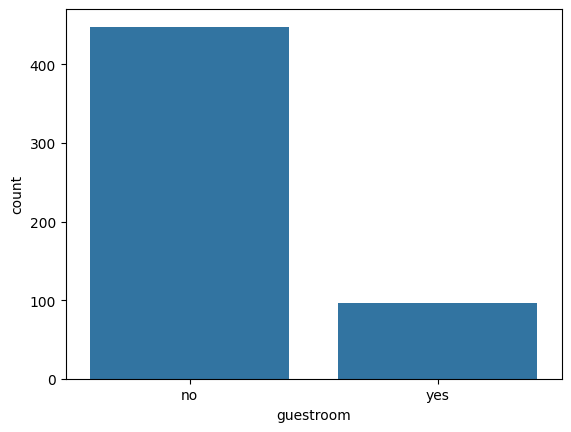

In [49]:
sns.countplot(data=df,
              x="guestroom")

-> Highly imbalance

In [50]:
df.groupby("guestroom")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
guestroom,,,,,,,,
no,448.0,4.544546e+06,1.827182e+06,1750000.0,3347750.0,4165000.0,5258750.0,13300000.0
yes,97.0,5.792897e+06,1.727829e+06,2450000.0,4690000.0,5495000.0,6419000.0,11410000.0


In [51]:
range_MS = (5495000.0 - 4165000.0)
print("range_MS",range_MS)

range_MS 1330000.0


In [52]:
# df has 'guestroom' and 'price'

# Median price per stories category
category_medians = df.groupby('guestroom')['price'].median()

# Compute IEM per category
iem = (category_medians - overall_median) / overall_std

print("Indicator Effect Magnitude (IEM) per category:")
print(iem)

Indicator Effect Magnitude (IEM) per category:
guestroom
no    -0.093561
yes    0.617502
Name: price, dtype: float64


-> Upward
-> weak '0' category and strong '1' category.
-> imbalance, shoudl use tree based model.
-> not overlap

========================================================================

binary encoding

In [53]:
df['guestroom'] = df["guestroom"].map({'yes': 1, 'no': 0 })

In [54]:
df['guestroom']

0      0
1      0
2      0
3      0
4      1
      ..
540    0
541    0
542    0
543    0
544    0
Name: guestroom, Length: 545, dtype: int64

=========================================================================

<Axes: xlabel='basement', ylabel='count'>

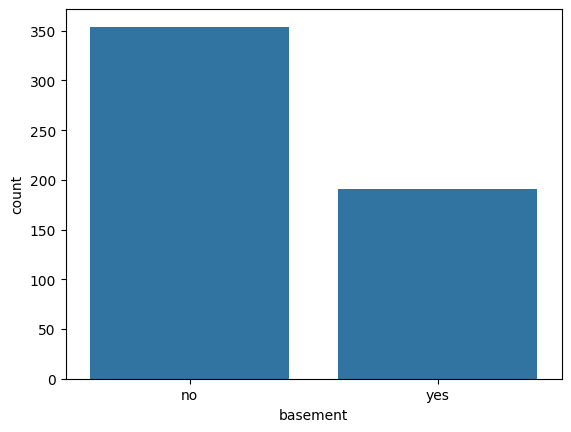

In [55]:
sns.countplot(data=df,
              x="basement")

In [56]:
df.groupby("basement")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
basement,,,,,,,,
no,354.0,4.509966e+06,1.841116e+06,1750000.0,3228750.0,4077500.0,5556250.0,13300000.0
yes,191.0,5.242615e+06,1.835394e+06,1820000.0,3998750.0,4900000.0,6020000.0,12250000.0


In [57]:
# df has 'basement' and 'price'

# Median price per basement	 category
category_medians = df.groupby('basement')['price'].median()

# Compute IEM per category
iem = (category_medians - overall_median) / overall_std

print("Indicator Effect Magnitude (IEM) per category:")
print(iem)

Indicator Effect Magnitude (IEM) per category:
basement
no    -0.140341
yes    0.299395
Name: price, dtype: float64


The IEM show Upward direction but weak standalone feature, slightly overlap and imblance but accptable. 

============================

In [58]:
df['basement'] = df["basement"].map({'yes': 1, 'no': 0 })

==============================================================================================

<Axes: xlabel='hotwaterheating', ylabel='count'>

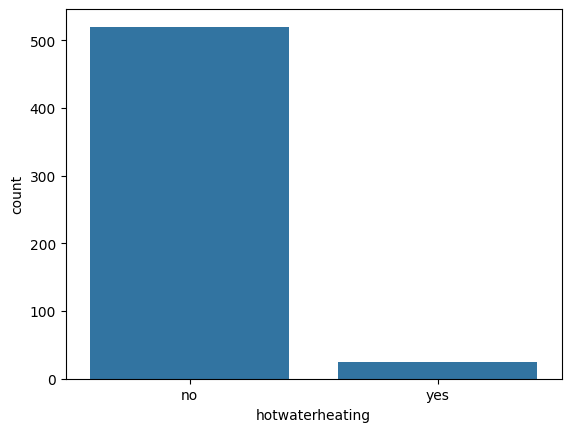

In [59]:
sns.countplot(data=df,
              x="hotwaterheating")

-> Highly imbalance

In [60]:
df.groupby("hotwaterheating")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
hotwaterheating,,,,,,,,
no,520.0,4.728593e+06,1.850960e+06,1750000.0,3430000.0,4329500.0,5674375.0,13300000.0
yes,25.0,5.559960e+06,2.127208e+06,2240000.0,3780000.0,5383000.0,6650000.0,9681000.0


In [61]:
df[df["hotwaterheating"] == 1].head(25)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


only sample have the both 'hostwaterheating' and 'airconditioning', I can fromed the new merage feature of 'hotwaterheating' and 'airconditioning'.


=========================================================

In [62]:
df['hotwaterheating'] = df["hotwaterheating"].map({'yes': 1, 'no': 0 })

In [63]:
df['hotwaterheating'].head()

0    0
1    0
2    0
3    0
4    0
Name: hotwaterheating, dtype: int64

===============================================================================================

<Axes: xlabel='airconditioning', ylabel='count'>

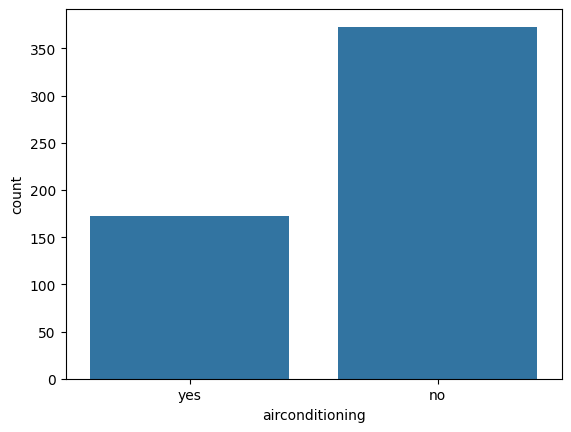

In [64]:
sns.countplot(data=df,
              x="airconditioning")

-> Imbalance

In [65]:
df.groupby("airconditioning")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
airconditioning,,,,,,,,
no,373.0,4.191940e+06,1.493712e+06,1750000.0,3150000.0,3885000.0,4900000.0,12250000.0
yes,172.0,6.013221e+06,1.998149e+06,2233000.0,4602500.0,5757500.0,7218750.0,13300000.0


In [66]:
median_shift = 5757500.0 - 3885000.0
print(median_shift)

1872500.0


In [67]:
# df has 'airconditioning' and 'price'

# Median price per airconditioning	 category
category_medians = df.groupby('airconditioning')['price'].median()

# Compute IEM per category
iem = (category_medians - overall_median) / overall_std

print("Indicator Effect Magnitude (IEM) per category:")
print(iem)

Indicator Effect Magnitude (IEM) per category:
airconditioning
no    -0.243258
yes    0.757843
Name: price, dtype: float64


The IEM show the direction Upward, strenght 'no' category is weak and 'yes' category is moderate to strong
, count is acceptable , not overlaping 

====================================================================

In [68]:
df["airconditioning"] = df["airconditioning"].map({'yes': 1, 'no': 0 })

In [69]:
df["airconditioning"]

0      1
1      1
2      0
3      1
4      1
      ..
540    0
541    0
542    0
543    0
544    0
Name: airconditioning, Length: 545, dtype: int64

=======================================================================

<Axes: xlabel='parking', ylabel='count'>

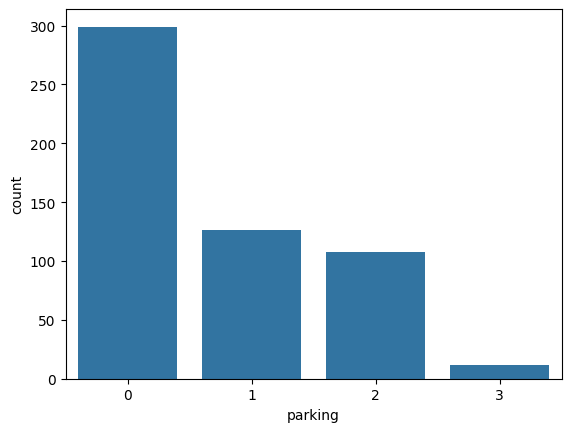

In [70]:
sns.countplot(data=df,
              x="parking")

In [71]:
df.groupby("parking")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
parking,,,,,,,,
0,299.0,4.136017e+06,1.359445e+06,1750000.0,3150000.0,3850000.0,4900000.0,10150000.0
1,126.0,5.190389e+06,1.879971e+06,1855000.0,3552500.0,4690000.0,6807500.0,9800000.0
2,108.0,5.896328e+06,2.169085e+06,1820000.0,4324250.0,5302500.0,6816250.0,13300000.0
3,12.0,5.867167e+06,3.210310e+06,3010000.0,3998750.0,4375000.0,6597500.0,12250000.0


In [72]:
range_MS = 5302500.0 - 3850000.0
print(range_MS)

1452500.0


In [73]:
# df has 'parking' and 'price'

# Median price per parking category
category_medians = df.groupby('parking')['price'].median()

# Compute IEM per category
iem = (category_medians - overall_median) / overall_std

print("Indicator Effect Magnitude (IEM) per category:")
print(iem)

Indicator Effect Magnitude (IEM) per category:
parking
0   -0.261970
1    0.187122
2    0.514585
3    0.018712
Name: price, dtype: float64



The IEM show the direction is Upward and weak '0' category, weak '1' category, weak to moderate '2' category. The catory '3' count is least we  ignore now but will do the sub-grouping this category. slightly overlaping

===================================


<Axes: xlabel='prefarea', ylabel='count'>

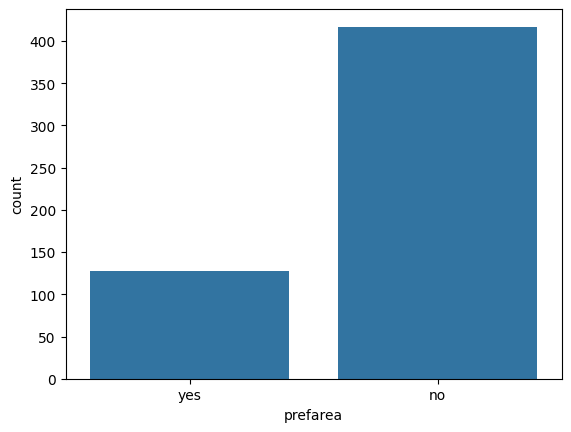

In [74]:
sns.countplot(data=df,
              x="prefarea")

-> Hightly imbalance

In [75]:
df.groupby("prefarea")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
prefarea,,,,,,,,
no,417.0,4.425299e+06,1.695811e+06,1750000.0,3255000.0,4095000.0,5110000.0,12250000.0
yes,128.0,5.879046e+06,1.984005e+06,2233000.0,4548250.0,5582500.0,6650000.0,13300000.0


In [76]:
median_shift = 5582500.0 - 4095000.0
print(median_shift)

1487500.0


In [77]:
# df has 'prefarea' and 'price'

# Median price per prefarea category
category_medians = df.groupby('prefarea')['price'].median()

# Compute IEM per category
iem = (category_medians - overall_median) / overall_std

print("Indicator Effect Magnitude (IEM) per category:")
print(iem)

Indicator Effect Magnitude (IEM) per category:
prefarea
no    -0.130985
yes    0.664282
Name: price, dtype: float64


The IEM show Upward directionaly and the category '0' have weak effect and '1' catgeory have the weak to moderate effect. sligthly overlap, count of 'yes' category is less but acceptable

===================================================================================

In [78]:
df["prefarea"] = df["prefarea"].map({'yes': 1, 'no': 0 })

In [79]:
df["prefarea"]

0      1
1      0
2      1
3      1
4      0
      ..
540    0
541    0
542    0
543    0
544    0
Name: prefarea, Length: 545, dtype: int64

===============================================================

<Axes: xlabel='furnishingstatus', ylabel='count'>

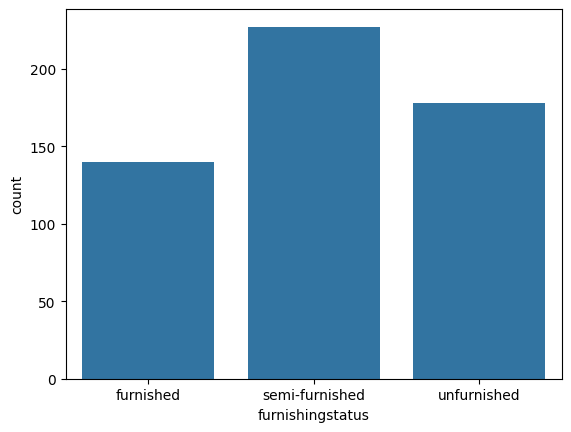

In [80]:
sns.countplot(data=df,
              x="furnishingstatus")

In [81]:
df.groupby("furnishingstatus")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
furnishingstatus,,,,,,,,
furnished,140.0,5.495696e+06,2.117857e+06,1750000.0,3876250.0,5075000.0,6650000.0,13300000.0
semi-furnished,227.0,4.907524e+06,1.596688e+06,1767150.0,3850000.0,4585000.0,5582500.0,12250000.0
unfurnished,178.0,4.013831e+06,1.720247e+06,1750000.0,2870000.0,3430000.0,4821250.0,10150000.0


In [82]:
range_MS = 5075000.0 - 3430000.0
print(range_MS)

1645000.0


In [83]:
# df has 'furnishingstatus' and 'price'

# Median price per furnishingstatus category
category_medians = df.groupby('furnishingstatus')['price'].median()

# Compute IEM per category
iem = (category_medians - overall_median) / overall_std

print("Indicator Effect Magnitude (IEM) per category:")
print(iem)

Indicator Effect Magnitude (IEM) per category:
furnishingstatus
furnished         0.392956
semi-furnished    0.130985
unfurnished      -0.486517
Name: price, dtype: float64


The IEM show the direction is Downward and the effect of category '1' is postive weak to moderate and the effect of category '2' is postive weak and the effect of category '3' is negtive moderate. Distribution slightly overlaping and the count of sample is acceptable.

===============================================

In [84]:
df["furnishingstatus"] = df["furnishingstatus"].map({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})

In [85]:
df["furnishingstatus"]

0      1
1      1
2      2
3      1
4      1
      ..
540    3
541    2
542    3
543    1
544    3
Name: furnishingstatus, Length: 545, dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


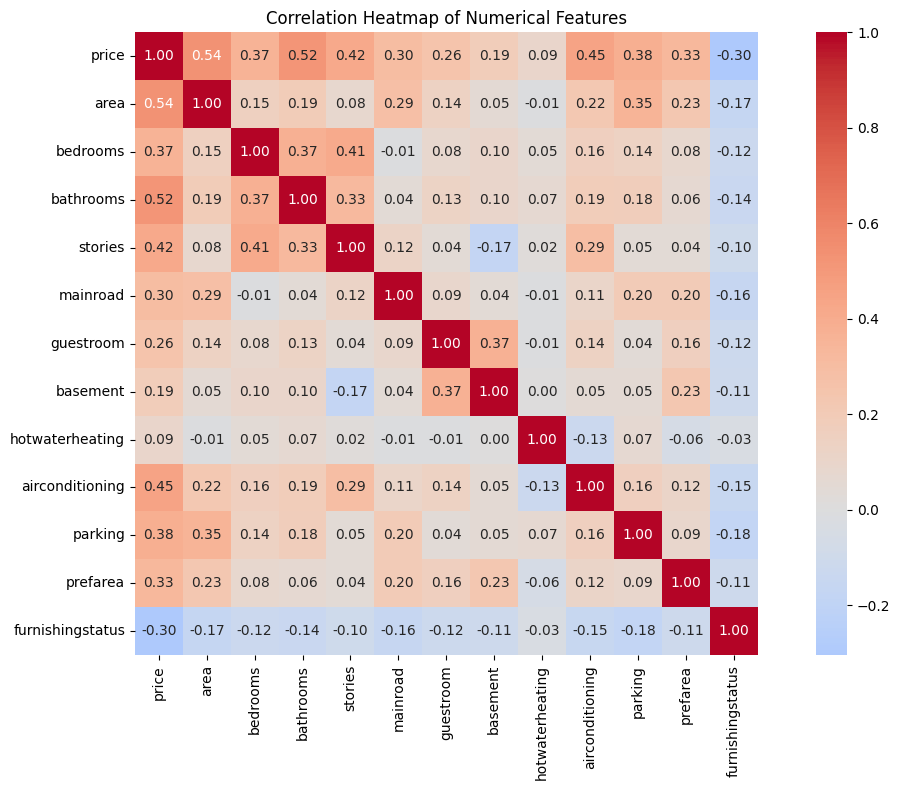

In [87]:
# select numerical columns only
num_df = df.select_dtypes(include=["int64", "float64"])

# compute correlation matrix
corr = num_df.corr()

# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


## Splitting the Dataset

I think the No_of_''bathrooms'' feature is not useful from real world use case 
''Hotwaterheating'' is highly imbalance and I want real question from user for predicting house price.
I drop these features 

In [120]:
features_to_drop = ["hotwaterheating", "bathrooms"]

X = df.drop(columns=features_to_drop + ["price"])
y = df["price"]


In [121]:
X

,area,bedrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,3,1,0,0,1,2,1,1
1,8960,4,4,1,0,0,1,3,0,1
2,9960,3,2,1,0,1,0,2,1,2
3,7500,4,2,1,0,1,1,3,1,1
4,7420,4,2,1,1,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,0,2,0,3
541,2400,3,1,0,0,0,0,0,0,2
542,3620,2,1,1,0,0,0,0,0,3
543,2910,3,1,0,0,0,0,0,0,1


In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## Data Preprocessing

Log transform the target

In [123]:
y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)


## Model Training

In [124]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train_log)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [125]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

dt_model.fit(X_train, y_train_log)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [126]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train_log)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [127]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=1.0,
    random_state=42
)

gbr_model.fit(X_train, y_train_log)


,loss,'squared_error'
,learning_rate,0.05
,n_estimators,300
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [128]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train_log)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## Evaluation

In [130]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gbr_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test_log, y_pred))
    R2_score = r2_score(y_test_log, y_pred)
    print(f"{name} RMSE: {rmse}")
    print(f"R^2_score: {R2_score} \n")

Linear Regression RMSE: 0.2856883264948554
R^2_score: 0.5773038773296408 

Decision Tree RMSE: 0.3194800963918521
R^2_score: 0.47139546145421796 

Random Forest RMSE: 0.2805121070206911
R^2_score: 0.5924822829292489 

Gradient Boosting RMSE: 0.2669751487905463
R^2_score: 0.6308652353074214 

XGBoost RMSE: 0.2856883264948554
R^2_score: 0.5773038773296408 



Decision Tree RMSE: 0.3069787611864795
R^2_score: 0.5119549274546548 

Random Forest RMSE: 0.26428680895849793
R^2_score: 0.6382619038770683 

Gradient Boosting RMSE: 0.2543209613496413
R^2_score: 0.6650287089054074 

XGBoost RMSE: 0.2721574295845295
R^2_score: 0.6163955265176779  


As a Real User testing

In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   area              545 non-null    int64
 1   bedrooms          545 non-null    int64
 2   bathrooms         545 non-null    int64
 3   stories           545 non-null    int64
 4   mainroad          545 non-null    int64
 5   guestroom         545 non-null    int64
 6   basement          545 non-null    int64
 7   hotwaterheating   545 non-null    int64
 8   airconditioning   545 non-null    int64
 9   parking           545 non-null    int64
 10  prefarea          545 non-null    int64
 11  furnishingstatus  545 non-null    int64
dtypes: int64(12)
memory usage: 51.2 KB


In [132]:
# User input 
user_input = {
    "area": 1125,
    "bedrooms": 5,
    "stories" : 2,
    "mainroad" : 1,
    "guestroom" : 1,
    "basement" : 0,
    "airconditioning" : 1,
    "parking" : 2,
    "prefarea" : 1,
    "furnishingstatus" : 1
}

# Convert to DataFrame
user_df = pd.DataFrame([user_input])

# Model prediction
prediction = model.predict(user_df)

# Real value in Currency
real_price = np.exp(prediction)

print("House Price:", real_price[0])

House Price: 4695292.5


Save the Model

In [118]:
import joblib

joblib.dump(gbr_model, "house_price_gb_model.pkl")


['house_price_gb_model.pkl']